# Wine Quality

---
author: Alex Kim
date: October 23, 2024
embed-resources: true
---

## Introduction

Wine is a popular alcoholic beverage that is made from fermented fruits. Wines are traditionally assessed by sommeliers, who are professionals that were extensively trained and specialized in wine services, especially wine-food pairings. As an employee of a startup that wants to develop an AI-powered sommelier, I intend to utilize physicochemical data gathered from wines and train machine learning models to predict a wine’s quality. This model will emulate the expertise of a human sommelier, serving to predict a wine’s quality given its physicochemical characteristics.

## Methods

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

To successfully develop a model that predicts a wine’s quality given its physicochemical characteristics, we will be utilizing physicochemical data for wines generated from chemistry equipment. The primary source of the data used in developing the model is UC Irvine Machine Learning Repository's Wine Quality dataset. This original source of the dataset is the paper titled "Modeling wine preferences by data mining from physicochemical properties" published by Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J.

### Data Dictionary

#### Response
* **quality** [int64]: the quality of the wine based on evaluation by a minimum of three sensory assessors (using blind tastes), which graded the wine in a scale that ranges from 0 (very bad) to 10 (excellent)

#### Feature
* **color** [object]: the (human perceivable) color of the wine, red or white
* **fixed acidity** [float64]: grams of tartaric acid per cubic decimeter
* **volatile acidity** [float64]: grams of acetic acid per cubic decimeter
* **citric acid** [float64]: grams of citric acid per cubic decimeter
* **residual sugar** [float64]: grams of residual sugar per cubic decimeter
* **chlorides** [float64]: grams of sodium chloride cubic decimeter
* **free sulfur dioxide** [float64]: milligrams of free sulfur dioxide per cubic decimeter
* **total sulfur dioxide** [float64]: milligrams of total sulfur dioxide per cubic decimeter
* **density** [float64]: the total density of the wine in grams per cubic centimeter
* **pH** [float64]: the acidity of the wine measured using pH 
* **sulphates** [float64]: grams of potassium sulphate cubic decimeter
* **alcohol** [float64]: percent alcohol by volume

### Data

In [3]:
# load data
wine_train = pd.read_csv(
    "https://cs307.org/lab-05/data/wine-train.csv",
)
wine_test = pd.read_csv(
    "https://cs307.org/lab-05/data/wine-test.csv",
)
wine_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.6,0.23,0.64,12.9,0.033,54.0,170.0,0.99800,3.00,0.53,8.8,5,white
1,NaN,0.75,0.01,2.2,0.059,11.0,18.0,0.99242,3.39,0.40,NaN,6,red
2,7.4,0.67,0.12,1.6,0.186,5.0,21.0,0.99600,3.39,0.54,9.5,5,red
3,6.4,0.18,0.74,NaN,0.046,54.0,168.0,0.99780,3.58,0.68,10.1,5,white
4,6.7,0.35,0.32,9.0,0.032,29.0,113.0,0.99188,3.13,0.65,12.9,7,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4152,6.6,0.32,0.22,16.7,0.046,38.0,133.0,0.99790,3.22,0.67,10.4,6,white
4153,9.2,0.58,0.20,3.0,0.081,15.0,115.0,0.99800,3.23,0.59,9.5,5,red
4154,8.2,0.60,0.17,2.3,0.072,11.0,73.0,0.99630,3.20,0.45,9.3,5,red
4155,6.5,0.23,0.36,16.3,0.038,43.0,133.0,0.99924,3.26,0.41,8.8,5,white


The train dataset contains 4157 rows and 13 columns. This tells us that there are 4157 samples and 12 features.

In [4]:
# summary statistics
wine_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3987.000000,4157.000000,3958.000000,3917.000000,4157.000000,4133.000000,4157.000000,4157.000000,3921.000000,3934.000000,3961.000000,4157.000000
mean,7.220579,0.342403,0.316478,5.430406,0.056358,30.600048,115.221915,0.994710,3.218454,0.531784,10.502847,5.814289
std,1.295282,0.166465,0.145276,4.750618,0.035460,17.906396,56.581139,0.003004,0.159184,0.150914,1.189918,0.868748
min,3.800000,0.080000,0.000000,0.600000,0.012000,1.000000,6.000000,0.987110,2.740000,0.230000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,17.000000,77.000000,0.992380,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,3.000000,0.048000,29.000000,118.000000,0.994900,3.210000,0.505000,10.300000,6.000000
75%,7.700000,0.410000,0.390000,8.100000,0.066000,41.000000,155.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.330000,1.230000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


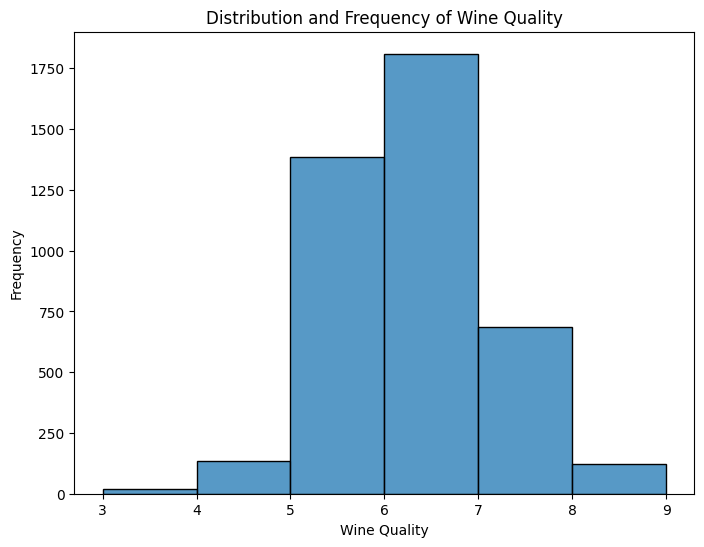

In [21]:
# visualizations
plt.figure(figsize=(8,6))
sns.histplot(wine_train["quality"],bins=6)
plt.title("Distribution and Frequency of Wine Quality")
plt.xlabel("Wine Quality")
plt.ylabel("Frequency")
plt.show()

Noting that the Wine Quality ranges from 0 (very bad) to 10 (excellent), the plot above shows that most wines are rated between 5 and 7. This indicates that the majority of the wines are average to good condition or quality. The wine quality rating of 6 seems to have the highest frequency compared to the rest. 

### Models

In [6]:
# process data for ML
# create X and y for train
X_train = wine_train.drop("quality", axis=1)
y_train = wine_train["quality"]

# create X and y for test
X_test = wine_test.drop("quality", axis=1)
y_test = wine_test["quality"]

In [7]:
wine_train.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

In [8]:
# train models
# note numeric and categorical features
numeric_features = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol'] 
categorical_features = ['color']

numeric_preprocessor = Pipeline(
    steps=[
        ("MedianImputer", SimpleImputer(strategy="median")),
        ("Standardize", StandardScaler()),
    ]
)

# define preprocessing pipeline for categorical
categorical_preprocessor = Pipeline(
    steps=[
        ("ModalImputer", SimpleImputer(strategy="most_frequent")),
        ("OneHotEncoder", OneHotEncoder(handle_unknown="infrequent_if_exist", max_categories=5)),
    ]
)

# column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("CategoricalPreprocessing", categorical_preprocessor, categorical_features),
        ("NumericProcessing", numeric_preprocessor, numeric_features),
    ],
    remainder="drop",
)

# full pipline
pipeline = Pipeline(
    steps=[
        ("Preprocessor", preprocessor),
        ("Regressor", DummyRegressor()),
    ]
)

In [9]:
# define parameter grid
param_grid = [
    {
        "Regressor": [DummyRegressor()],
    },
    {
        "Regressor": [LinearRegression()],
    },
    {
        "Regressor": [KNeighborsRegressor()],
        "Regressor__n_neighbors": [1, 3, 5, 7, 9, 11, 15],
    },
    {
        "Regressor": [DecisionTreeRegressor()],
        "Regressor__max_depth": [1, 3, 5, 7, 9, 11, 15, None],
    },
    {
        "Regressor": [HistGradientBoostingRegressor()],
        "Regressor__learning_rate": [0.1, 0.01, 0.001],
        "Regressor__max_iter": [1000],
        "Regressor__max_depth": [None, 3],
        "Regressor__l2_regularization": [0.1, 1.0],
    },
]

In [10]:
pipeline

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('CategoricalPreprocessing',
                                                  Pipeline(steps=[('ModalImputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('OneHotEncoder',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                 max_categories=5))]),
                                                  ['color']),
                                                 ('NumericProcessing',
                                                  Pipeline(steps=[('MedianImputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Standardize',
                                                                   StandardScaler())]),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                                   'total sulfur dioxide',
                                                   'density', 'pH', 'sulphates',
                                                   'alcohol'])])),
                ('Regressor', DummyRegressor())])

In [11]:
mod = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    n_jobs=-1,
    cv=5,
    verbose=2,
    scoring="neg_mean_absolute_error",
)

In [12]:
mod.fit(X_train, y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[CV] END .........................Regressor=DummyRegressor(); total time=   0.0s
[CV] END .........................Regressor=DummyRegressor(); total time=   0.0s
[CV] END .......................Regressor=LinearRegression(); total time=   0.0s
[CV] END .........................Regressor=DummyRegressor(); total time=   0.0s
[CV] END .......................Regressor=LinearRegression(); total time=   0.0s
[CV] END .........................Regressor=DummyRegressor(); total time=   0.0s
[CV] END .......................Regressor=LinearRegression(); total time=   0.0s
[CV] END .......................Regressor=LinearRegression(); total time=   0.0s
[CV] END Regressor=KNeighborsRegressor(), Regressor__n_neighbors=1; total time=   0.0s
[CV] END Regressor=KNeighborsRegressor(), Regressor__n_neighbors=1; total time=   0.0s
[CV] END Regressor=KNeighborsRegressor(), Regressor__n_neighbors=1; total time=   0.0s
[CV] END Regressor=KNeighborsRegressor(), Regressor__n_neighbors=1; total time=   0.0s
[CV]

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Preprocessor',
                                        ColumnTransformer(transformers=[('CategoricalPreprocessing',
                                                                         Pipeline(steps=[('ModalImputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('OneHotEncoder',
                                                                                          OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                                        max_categories=5))]),
                                                                         ['color']),
                                                                        ('NumericProcessing',
                                                                         Pipeline(steps=[('MedianImputer',
                                                                                          Sim...
                          'Regressor__n_neighbors': [1, 3, 5, 7, 9, 11, 15]},
                         {'Regressor': [DecisionTreeRegressor()],
                          'Regressor__max_depth': [1, 3, 5, 7, 9, 11, 15,
                                                   None]},
                         {'Regressor': [HistGradientBoostingRegressor()],
                          'Regressor__l2_regularization': [0.1, 1.0],
                          'Regressor__learning_rate': [0.1, 0.01, 0.001],
                          'Regressor__max_depth': [None, 3],
                          'Regressor__max_iter': [1000]}],
             scoring='neg_mean_absolute_error', verbose=2)

In [13]:
mod.best_params_

{'Regressor': HistGradientBoostingRegressor(),
 'Regressor__l2_regularization': 0.1,
 'Regressor__learning_rate': 0.1,
 'Regressor__max_depth': None,
 'Regressor__max_iter': 1000}

In [14]:
print(f"CV MAE: {-mod.best_score_}")

CV MAE: 0.4779188339020678


This model achieves a cross validation Mean Absolute Error (MAE) of 0.47791. 

## Results

In [15]:
# report model metrics
y_test_pred = mod.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
print(f"Test MAE: {test_mae}")

Test MAE: 0.46716804959251995


This model achieves a test Mean Absolute Error (MAE) of 0.46716. 

## Discussion

Through the development process of the model that predicts wine quality, I developed a model that achieves a cross validation test mean absolute error of 0.47791 and a test mean absolute error of 0.46716. The cost of the chemistry equipment and processes are not worth removing humans from this process. Features that are mostly chemical information were utilized to fit the model. As mentioned earlier, the model shows pretty strong performance and with reasonable accuracy, according to both cross-validation mean absolute error and test mean absolute error. However, this model would not be practical to be put into practice in a real-world scenario. There are various factors that may have been overlooked and not considered when developing the model. These factors could be something like personal prefences and suggestions based on experience, which are difficult things to quantify through physicochemical properties or features. Another problem arises from this model as the wine quality data given are integers. There is high chance that the predictions from this regression model are not integer. This may not seem like an extremely huge issue, but the results may be easier to understand if the predictions are rounded. Therefore, this 'AI' can not fully replace all aspects of a human sommelier. 

### Conclusion

This AI-powered sommelier model was able to predict the wine quality pretty well given the physicochemical properties and features. Although this model showed a pretty strong potential and performance, it is still not ideal to use this model for real-world scenario. The model can be a valuable tool for those who enjoy wine and those who produce them. This model itself can not fully replace all human sommeliers, who brings unique insight and pairing knowledge that is hard to be captured in data. 